# Quantum Computing and Graph Theory - Classical Implementation

In [1]:
# Setup
import math as m
import numpy as np
import scipy.special as scpp
import matplotlib.pyplot as plt

from graph import Graph

### Graph Class Testing

Bit string: 101100
Bit integer: 44
Adjacency matrix from bitstring:
 [[0 1 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
Adjacency matrix:
 [[0 1 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
Edge sequence (sum of rows): [2 2 1 1]
Connectivity sequence (upper-triangle binary string value): [5. 2. 0. 0.]


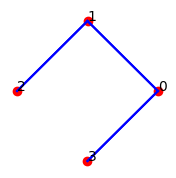

In [2]:
example_graph = Graph(np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
]))


print("Bit string:", example_graph.to_bitstring())
print("Bit integer:", example_graph.to_bitint())
print("Adjacency matrix from bitstring:\n", Graph.bitstring_to_adjacency_matrix(example_graph.to_bitstring()))
print("Adjacency matrix:\n", example_graph.adj_matrix)
print("Edge sequence (sum of rows):", example_graph.get_edge_sequence())
print("Connectivity sequence (upper-triangle binary string value):", example_graph.get_connectivity_sequence())
example_graph.plot_graph(vertex_labels=True)

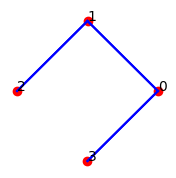

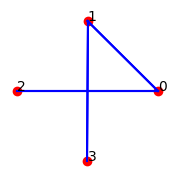

In [3]:
example_graph = Graph(np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
]))

example_graph.plot_graph(vertex_labels=True)
example_graph.permute(2,3)
example_graph.plot_graph(vertex_labels=True)

#### $\mathbb{H}$(3)

i Bitstring Bitint Edge-Sequence Edge-Count Connectivity-Sequence Connectivity-Sum
0 000 0 [0 0 0] [0. 0. 0.] 0.0
1 001 1 [0 1 1] [0. 1. 0.] 1.0
2 011 3 [1 1 2] [1. 1. 0.] 2.0
3 111 7 [2 2 2] [3. 1. 0.] 4.0


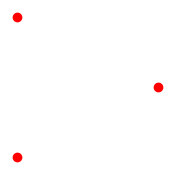

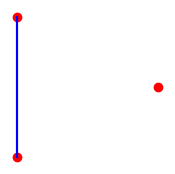

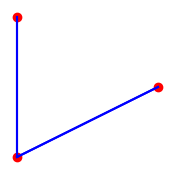

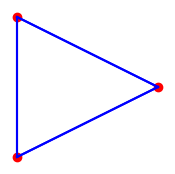

In [4]:
H3 = [
    Graph(Graph.bitstring_to_adjacency_matrix("000")),
    Graph(Graph.bitstring_to_adjacency_matrix("001")),
    Graph(Graph.bitstring_to_adjacency_matrix("011")),
    Graph(Graph.bitstring_to_adjacency_matrix("111")),
]

print("i", "Bitstring", "Bitint", "Edge-Sequence" ,"Edge-Count", "Connectivity-Sequence", "Connectivity-Sum")
for i, h in enumerate(H3):
    print(i, h.to_bitstring(), h.to_bitint(), h.get_edge_sequence(), h.get_connectivity_sequence(), np.sum(h.get_connectivity_sequence()))

for h in H3:
    h.plot_graph()

#### $\mathbb{H}$(4)

i  Bitstring Bitint Edge-Sequence Edge-Count Connectivity-Sequence Connectivity-Sum
0  000000 0 [0 0 0 0] 0.0 [0. 0. 0. 0.] 0.0
1  000001 1 [0 0 1 1] 1.0 [0. 0. 1. 0.] 1.0
2  000011 3 [0 1 1 2] 2.0 [0. 1. 1. 0.] 2.0
3  100001 33 [1 1 1 1] 2.0 [4. 0. 1. 0.] 5.0
4  000111 7 [0 2 2 2] 3.0 [0. 3. 1. 0.] 4.0
5  001101 13 [1 1 2 2] 3.0 [1. 2. 1. 0.] 4.0
6  010101 21 [1 1 3 1] 3.0 [2. 2. 1. 0.] 5.0
7  011101 29 [2 1 3 2] 4.0 [3. 2. 1. 0.] 6.0
8  101101 45 [2 2 2 2] 4.0 [5. 2. 1. 0.] 8.0
9  110111 55 [2 3 3 2] 5.0 [6. 3. 1. 0.] 10.0
10 011111 31 [2 2 3 3] 5.0 [3. 3. 1. 0.] 7.0


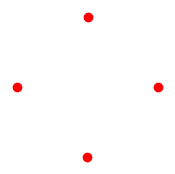

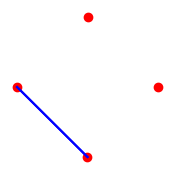

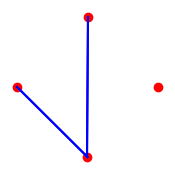

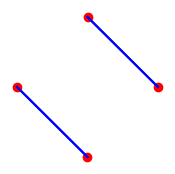

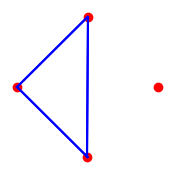

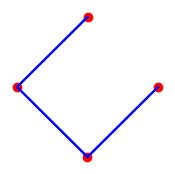

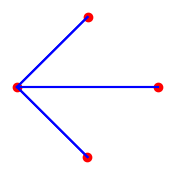

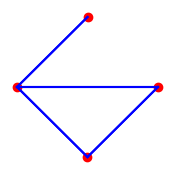

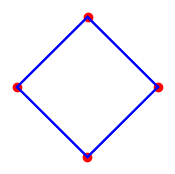

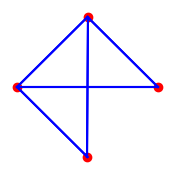

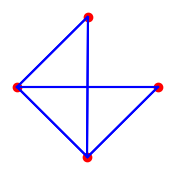

In [5]:
H4 = [
    Graph(Graph.bitstring_to_adjacency_matrix("000000")),
    Graph(Graph.bitstring_to_adjacency_matrix("000001")),
    Graph(Graph.bitstring_to_adjacency_matrix("000011")),
    Graph(Graph.bitstring_to_adjacency_matrix("100001")),
    Graph(Graph.bitstring_to_adjacency_matrix("000111")),
    Graph(Graph.bitstring_to_adjacency_matrix("001101")),
    Graph(Graph.bitstring_to_adjacency_matrix("010101")),
    Graph(Graph.bitstring_to_adjacency_matrix("011101")),
    Graph(Graph.bitstring_to_adjacency_matrix("101101")),
    Graph(Graph.bitstring_to_adjacency_matrix("110111")),
    Graph(Graph.bitstring_to_adjacency_matrix("011111")),
]

print("i ", "Bitstring", "Bitint", "Edge-Sequence" ,"Edge-Count", "Connectivity-Sequence", "Connectivity-Sum")
for i, h in enumerate(H4):
    print(f"{i: <2}", h.to_bitstring(), h.to_bitint(), h.get_edge_sequence(), h.get_edge_count(), h.get_connectivity_sequence(), np.sum(h.get_connectivity_sequence()))

for h in H4:
    h.plot_graph()

## Graphs of size $n$

* $\mathbb{G}(n)$ - The set of all graphs of size $n$
* $\mathbb{H}(n)$ - The set of all non-homomorphic graphs of size $n$

#### Visualizing the number of graphs

* The size of $\mathbb{G}(n)$ is $2^{n(n-1)/2}$
* The upperbound on the size of $\mathbb{H}(n)$ is $n!$

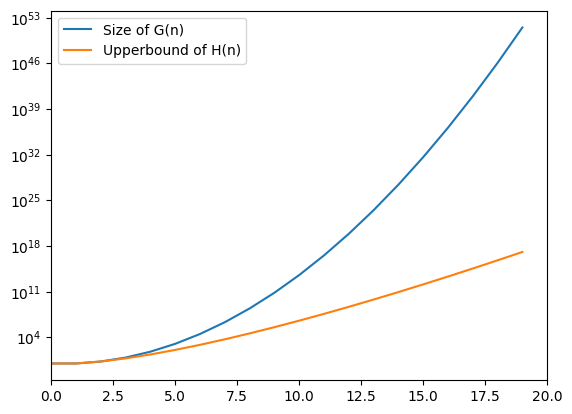

In [6]:
n = np.arange(20, dtype=np.int32)
# size_G = np.power(np.array(n * (n - 1) / 2, dtype=np.int32), [2])
size_G = 2 ** (n * (n - 1) / 2)
size_H = scpp.factorial(n)

plt.plot(n, size_G, label='Size of G(n)')
plt.plot(n, size_H, label='Upperbound of H(n)')

plt.legend(loc='upper left')
plt.xlim(left=0, right=20)
plt.yscale('log')

### Constructing $\mathbb{G}(n)$ and $\mathbb{H}(n)$

In [7]:
graph_size = 5
bitlength = int(graph_size * (graph_size - 1) / 2) # not reused because has different meaning
num_graphs = int( 2**(graph_size * (graph_size - 1) / 2) )
num_hgraphs = int(m.factorial(graph_size))

print(f"n = {graph_size}")
print(f"|G(n)| = {num_graphs:,}".replace(',',' '))
print(f"<=|H(n)| = {num_hgraphs:,}".replace(',', ' '))
print(f"Order of Magnitude |G(n)| = {m.ceil(m.log10(num_graphs))}")
print(f"Order of Magnitude <=|H(n)| = {m.ceil(m.log10(num_hgraphs))}")

n = 5
|G(n)| = 1 024
<=|H(n)| = 120
Order of Magnitude |G(n)| = 4
Order of Magnitude <=|H(n)| = 3


#### Generating $\mathbb{G}(n)$

> WARNING: Will only work for $n <= 8$ 

In [8]:
G = []
if graph_size > 7:
    raise UserWarning(f"Too large n = {graph_size} for G(n) generation\n\tThere are {num_graphs} graphs in G({graph_size})")

for i in range(num_graphs):
    if i % 10_000 == 0:
        print(f"\rGenerated {i / num_graphs * 100:.2f}% of all graphs", end='')

    graph_bitstring = bin(i)[2:].zfill(bitlength)
    G.append(Graph(Graph.bitstring_to_adjacency_matrix(graph_bitstring)))
print(f"\rGenerated 100.00% of all graphs")


Generated 100.00% of all graphs


In [9]:
for i, g in enumerate(G):
    print(i, g.to_bitint(), g.to_bitstring())

0 0 0000000000
1 1 0000000001
2 2 0000000010
3 3 0000000011
4 4 0000000100
5 5 0000000101
6 6 0000000110
7 7 0000000111
8 8 0000001000
9 9 0000001001
10 10 0000001010
11 11 0000001011
12 12 0000001100
13 13 0000001101
14 14 0000001110
15 15 0000001111
16 16 0000010000
17 17 0000010001
18 18 0000010010
19 19 0000010011
20 20 0000010100
21 21 0000010101
22 22 0000010110
23 23 0000010111
24 24 0000011000
25 25 0000011001
26 26 0000011010
27 27 0000011011
28 28 0000011100
29 29 0000011101
30 30 0000011110
31 31 0000011111
32 32 0000100000
33 33 0000100001
34 34 0000100010
35 35 0000100011
36 36 0000100100
37 37 0000100101
38 38 0000100110
39 39 0000100111
40 40 0000101000
41 41 0000101001
42 42 0000101010
43 43 0000101011
44 44 0000101100
45 45 0000101101
46 46 0000101110
47 47 0000101111
48 48 0000110000
49 49 0000110001
50 50 0000110010
51 51 0000110011
52 52 0000110100
53 53 0000110101
54 54 0000110110
55 55 0000110111
56 56 0000111000
57 57 0000111001
58 58 0000111010
59 59 0000111011


#### Generating $\mathbb{H}(n)$

> WARNING: Will only work for $n <= 11$ 

In [10]:
if graph_size > 11:
    raise UserWarning(f"Too large n = {graph_size} for H(n) generation\n\tThere are {num_hgraphs} graphs in H({graph_size})")

H = []
